# Table of content
- [Summary](#Summary)
- [HISAT2 alignment](#HISAT2-alignment)
- [Post-alignment QC](#Post-alignment-QC)
- [FPKM/TPM expression estimates with Stringtie](#FPKM/TPM-expression-estimates-with-Stringtie)
- [Raw counts with htseq-count](#Raw-counts-with-htseq-count)
- StringTie: 1410 gene IDs -> Ballgown: 314 gene IDs
- htseq-count: 1410 gene IDs -> edgeR: 328 gene IDs
- htseq-count: 1410 gene IDs -> DESeq2: 297 gene IDs
- Number of UNIQUE significant DEGs (p <0.05) after Stringtie+Ballgown or htseq-count+edgeR or htseq-count+DESeq2
- Venn diagram showing overlapping significant DEG from 3 methods

### Summary: 
- After alignment with HISAT2, both Stringtie and htseq-count were able to annotate 1410 unique gene IDs.
    - 1410 gene IDs from StringTie were filtered and selected for pval < 0.05 during Ballgown DE analysis -> 314 gene IDs -> 311 unique gene symbols
    - 1410 gene IDs from htseq-count were filtered and selected for FDR < 0.05
        - during edgeR DE analysis -> 328 gene IDs -> 328 unique gene symbols
        - during DESeq2 DE analysis -> 297 gene IDs -> 296 unique gene symbols

### HISAT2 alignment
HISAT2 aligns your RNA-seq reads (FASTQ files) to a reference genome.

Data is from MultiQC report, for more precise number of reads for each samples, view according fastQC files.

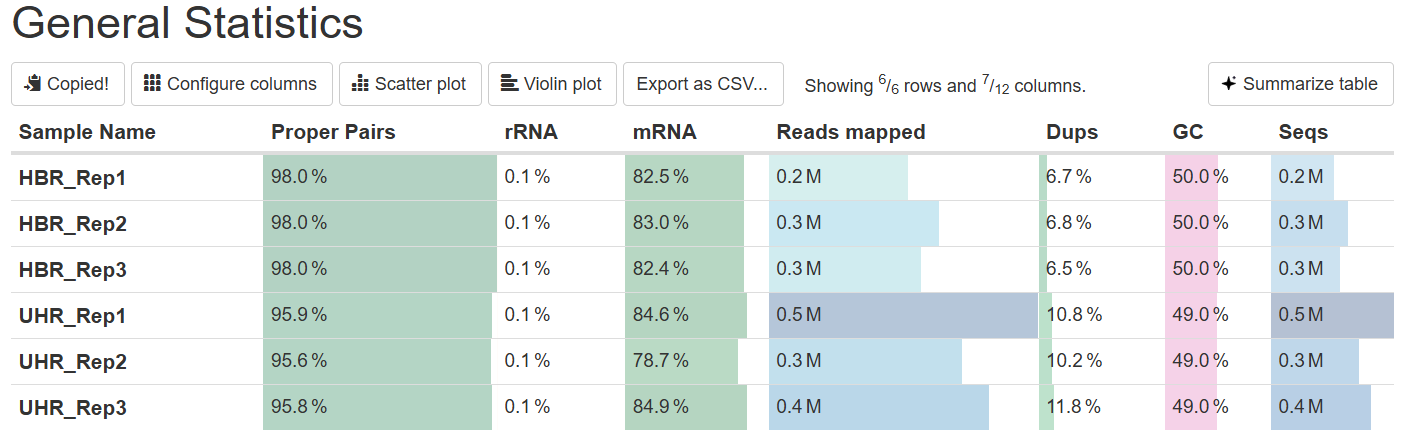

### Post-alignment QC

In [5]:
# with samtools flagstat for example:
cd $RNA_ALIGN_DIR
echo "flagstat for UHR"
samtools flagstat UHR.bam

echo #add empty line between 2 outputs

echo "flagstat for HBR"
samtools flagstat HBR.bam

flagstat for UHR
1174955 + 0 in total (QC-passed reads + QC-failed reads)
1150414 + 0 primary
24541 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
1173743 + 0 mapped (99.90% : N/A)
1149202 + 0 primary mapped (99.89% : N/A)
1150414 + 0 paired in sequencing
575207 + 0 read1
575207 + 0 read2
1143860 + 0 properly paired (99.43% : N/A)
1148598 + 0 with itself and mate mapped
604 + 0 singletons (0.05% : N/A)
6 + 0 with mate mapped to a different chr
6 + 0 with mate mapped to a different chr (mapQ>=5)

flagstat for HBR
793963 + 0 in total (QC-passed reads + QC-failed reads)
786366 + 0 primary
7597 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
793356 + 0 mapped (99.92% : N/A)
785759 + 0 primary mapped (99.92% : N/A)
786366 + 0 paired in sequencing
393183 + 0 read1
393183 + 0 read2
783124 + 0 properly paired (99.59% : N/A)
785496 + 0 with itself and mate mapped
263 + 0 singletons (0.03% : N/A)
0 + 0 with mate mapped to a different chr
0

### FPKM/TPM expression estimates with Stringtie
Takes the aligned reads from HISAT2 and reconstructs transcripts. We provided a reference annotation GTF file, StringTie will:
- Quantify known transcripts and genes (reference mode),
- Calculates abundance estimates (FPKM, TPM)

📁 Files in the [output folder](http://107.23.14.131/rnaseq/expression/stringtie/ref_only/) – What they are:

| File                  | Description                                                                           |
| --------------------- | ------------------------------------------------------------------------------------- |
| `gene_abundances.tsv` | Gene-level abundance matrix (FPKM, TPM) — ✅ used for gene count                      |
| `e2t.ctab`            | Maps exons to transcripts                                                             |
| `e_data.ctab`         | Exon-level expression values                                                          |
| `i2t.ctab`            | Maps introns to transcripts                                                           |
| `i_data.ctab`         | Intron-level expression values                                                        |
| `t_data.ctab`         | Transcript-level expression values (FPKM) — ✅ used for **transcript count**          |
| `transcripts.gtf`     | Combined transcript annotation (optional, depending on pipeline usage)                |

🔍 About t_data.ctab:
- Each row corresponds to a transcript
- It includes transcript ID and abundance estimates (TPM, coverage, etc.)
- It's generated by StringTie when using -B flag (Ballgown-compatible)

| What you want      | File                  | How to get it                             |
| ------------------ | --------------------- | ----------------------------------------- |
| Unique genes       | `gene_abundances.tsv` | `tail -n +2 gene_abundances.tsv \| wc -l` |
| Unique transcripts | `t_data.ctab`         | `tail -n +2 t_data.ctab \| wc -l`         |

/rnaseq/expression/stringtie/ref_only/ directory contains multiple folders: HBR_Rep1, HBR_Rep2, HBR_Rep3, UHR_Rep1, HBR_Rep2, HBR_Rep3. Each folder contains gene_abundances.tsv and t_data.ctab. The bash loop below goes into each folder and count unique genes and unique transcripts!

**We'll see that for each sample:** 
- **Unique gene IDs: 1410**
- **Unique transcript IDs: 4564**

In [6]:
cd $RNA_HOME/expression/stringtie/ref_only/

# Loop over each sample directory
for dir in */; do
  echo "Processing $dir"

  # Remove trailing slash for cleaner output
  sample=$(basename "$dir")

  # Count unique genes (excluding header)
  gene_count=$(tail -n +2 "${dir}/gene_abundances.tsv" | wc -l) #"tail -n +2" start printing from line 2 onward, skip the header

  # Count unique transcripts (excluding header)
  transcript_count=$(tail -n +2 "${dir}/t_data.ctab" | wc -l)

  echo "  Sample: $sample"
  echo "    Unique genes: $gene_count"
  echo "    Unique transcripts: $transcript_count"
done

Processing HBR_Rep1/
  Sample: HBR_Rep1
    Unique genes: 1410
    Unique transcripts: 4564
Processing HBR_Rep2/
  Sample: HBR_Rep2
    Unique genes: 1410
    Unique transcripts: 4564
Processing HBR_Rep3/
  Sample: HBR_Rep3
    Unique genes: 1410
    Unique transcripts: 4564
Processing UHR_Rep1/
  Sample: UHR_Rep1
    Unique genes: 1410
    Unique transcripts: 4564
Processing UHR_Rep2/
  Sample: UHR_Rep2
    Unique genes: 1410
    Unique transcripts: 4564
Processing UHR_Rep3/
  Sample: UHR_Rep3
    Unique genes: 1410
    Unique transcripts: 4564


### Raw counts with htseq-count
**Number of unique gene IDs: 1410**

In [11]:
cd $RNA_HOME/expression/htseq_counts/

echo "Number of gene in HBR_Rep1"
grep -v "^__" HBR_Rep1_gene.tsv | wc -l #remember to exclude lines starting with "__", eg, __no_feature, __too_low_aQual

echo "Number of gene in HBR_Rep2"
grep -v "^__" HBR_Rep2_gene.tsv | wc -l

echo "Number of gene in HBR_Rep3"
grep -v "^__" HBR_Rep3_gene.tsv | wc -l

echo "Number of gene in UHR_Rep1"
grep -v "^__" UHR_Rep1_gene.tsv | wc -l

echo "Number of gene in UHR_Rep2"
grep -v "^__" UHR_Rep2_gene.tsv | wc -l

echo "Number of gene in UHR_Rep3"
grep -v "^__" UHR_Rep3_gene.tsv | wc -l

echo "Number of gene in all samples"
tail -n +2 	gene_read_counts_table_all_final.tsv | wc -l #this file contain all samples, with "__" lines removed, with a header.

Number of gene in HBR_Rep1
1410
Number of gene in HBR_Rep2
1410
Number of gene in HBR_Rep3
1410
Number of gene in UHR_Rep1
1410
Number of gene in UHR_Rep2
1410
Number of gene in UHR_Rep3
1410
Number of gene in all samples
1410


In [ ]:
# Clean bash loop!

# Define the list of samples
samples=("HBR_Rep1" "HBR_Rep2" "HBR_Rep3" "UHR_Rep1" "UHR_Rep2" "UHR_Rep3") #a Bash array with six elements

# Loop through each sample and count valid gene lines
for sample in "${samples[@]}"; do #[@] tells Bash to go to each element in the array
  file="${sample}_gene.tsv"
  echo "Number of genes in ${sample}:"
  grep -v "^__" "$file" | wc -l
done

### StringTie: 1410 gene IDs -> Ballgown: 314 gene IDs
**Number of filtered genes that are statistically significant (pval < 0.05), not unique yet: 314 genes**

In [14]:
cd $RNA_HOME/de/ballgown/ref_only/

echo "number of genes before filtering, should be 1410 genes obtained from stringtie"
tail -n +2 UHR_vs_HBR_gene_results.tsv | wc -l #Or: grep -v feature UHR_vs_HBR_gene_results.tsv | wc -l

echo "number of genes after filtering low-abundance genes" 
# remove all transcripts with a variance across the samples of less than one: bg_filt = subset (bg, "rowVars(texpr(bg)) > 1", genomesubset = TRUE)
tail -n +2 UHR_vs_HBR_gene_results_filtered.tsv | wc -l

echo "number of filtered genes that are statistically significant (pval < 0.05)"
# sig_genes = subset(results_genes, results_genes$pval<0.05)
tail -n +2 UHR_vs_HBR_gene_results_sig.tsv | wc -l
# extract gene_name: grep -v feature UHR_vs_HBR_gene_results_sig.tsv | cut -f 6 | sed 's/\"//g' > DE_genes.txt
wc -l DE_genes.txt

number of genes before filtering, should be 1410 genes obtained from stringtie
1410
number of genes after filtering low-abundance genes
830
number of filtered genes that are statistically significant (pval < 0.05)
314
314 DE_genes.txt


### htseq-count: 1410 gene IDs -> edgeR: 328 gene IDs
Genes obtained from htseq-count have to passed these requirement to be considered significant DEG:
- Require at least 1/6 of samples to have expressed count >= 10
- only select up/down significant genes at FDR <= 0.05  significance level

In [25]:
echo "edgeR-Number of genes passed requirements for edgeR analysis:"
tail -n +2 $RNA_HOME/de/htseq_counts/edgeR_DE_genes.txt | wc -l

edgeR-Number of genes passed requirements for edgeR analysis:
328


### htseq-count: 1410 gene IDs -> DESeq2: 297 gene IDs
Genes obtained from htseq-count have to passed these requirement to be considered significant DEG:
- Require at least 1/6 of samples to have expressed count >= 10
- log2FC shrinkage
- p-adj < 0.05

#### Calling DESeq2 will perform the following actions:
- Estimation of size factors. i.e. accounting for differences in sequencing depth (or library size) across samples.
- Estimation of dispersion. i.e. estimate the biological variability (over and above the expected variation from sampling) in gene expression across biological replicates. This is needed to assess the significance of differences across conditions. Additional work is performed to correct for higher dispersion seen for genes with low expression.
- Perform “independent filtering” to reduce the number of statistical tests performed (see ?results and [this paper](https://doi.org/10.1073/pnas.0914005107) for details)
- Negative Binomial GLM fitting and performing the Wald statistical test
- Correct p values for multiple testing using the Benjamini-Hochberg method

In [24]:
echo "DESeq2-Number of filtered genes that are statistically significant (p-adj < 0.05):"
tail -n +2 $RNA_HOME/de/deseq2/DE_sig_genes_DESeq2.tsv | wc -l

DESeq2-Number of filtered genes that are statistically significant (p-adj < 0.05):
297


### Number of UNIQUE significant DEGs (p <0.05) after Stringtie+Ballgown or htseq-count+edgeR or htseq-count+DESeq2

In [16]:
# see how many unique significant DEG are obtained from each method:
cd $RNA_HOME/de/

#cut -f 1 $RNA_HOME/de/ballgown/ref_only/DE_genes.txt | sort | uniq > ballgown_DE_gene_symbols.txt
#cut -f 2 $RNA_HOME/de/htseq_counts/edgeR_DE_genes.txt | sort | uniq | grep -v Gene_Name > htseq_counts_edgeR_DE_gene_symbols.txt
#cut -f 7 $RNA_HOME/de/deseq2/DE_sig_genes_DESeq2.tsv | sort | uniq | grep -v Symbol > DESeq2_DE_gene_symbols.txt

echo "Number of UNIQUE significant DEGs (p <0.05) after Stringtie+Ballgown:"
wc -l ballgown_DE_gene_symbols.txt

echo

echo "Number of UNIQUE significant DEGs (p <0.05) after htseq-count+edgeR:"
wc -l htseq_counts_edgeR_DE_gene_symbols.txt

echo

echo "Number of UNIQUE significant DEGs (p <0.05) after htseq-count+DESeq2:"
wc -l DESeq2_DE_gene_symbols.txt

Number of UNIQUE significant DEGs (p <0.05) after Stringtie+Ballgown:
311 ballgown_DE_gene_symbols.txt

Number of UNIQUE significant DEGs (p <0.05) after htseq-count+edgeR:
328 htseq_counts_edgeR_DE_gene_symbols.txt

Number of UNIQUE significant DEGs (p <0.05) after htseq-count+DESeq2:
296 DESeq2_DE_gene_symbols.txt


#### To find the genes that were duplicated (i.e., appeared more than once in the original file and were eliminated by uniq

In [18]:
echo "Duplicated gene symbols/names removed from Ballgown's filtered and signidicant gene list with each line contains unique gene_ID:" 
cut -f1 "$RNA_HOME/de/ballgown/ref_only/DE_genes.txt" | sort | uniq -d #uniq -d: outputs only duplicate lines
echo "This happens because multiple gene_IDs can map to the same gene symbol"

Duplicated gene symbols/names removed from Ballgown's filtered and signidicant gene list with each line contains unique gene_ID:
DGCR5
DUXAP8
ELFN2
This happens because multiple gene_IDs can map to the same gene symbol


In [26]:
echo "Duplicated gene symbols/names removed from DESeq2's filtered and signidicant gene list with each line contains unique gene_ID:" 
cut -f 7 $RNA_HOME/de/deseq2/DE_sig_genes_DESeq2.tsv | sort | uniq -d #uniq -d: outputs only duplicate lines
echo "This happens because multiple gene_IDs can map to the same gene symbol"

Duplicated gene symbols/names removed from DESeq2's filtered and signidicant gene list with each line contains unique gene_ID:
DGCR5
This happens because multiple gene_IDs can map to the same gene symbol


### Venn diagram showing overlapping significant DEG from 3 methods 

View Module03_CompareDEgenesAcrossMethods.ipynb for explanation.

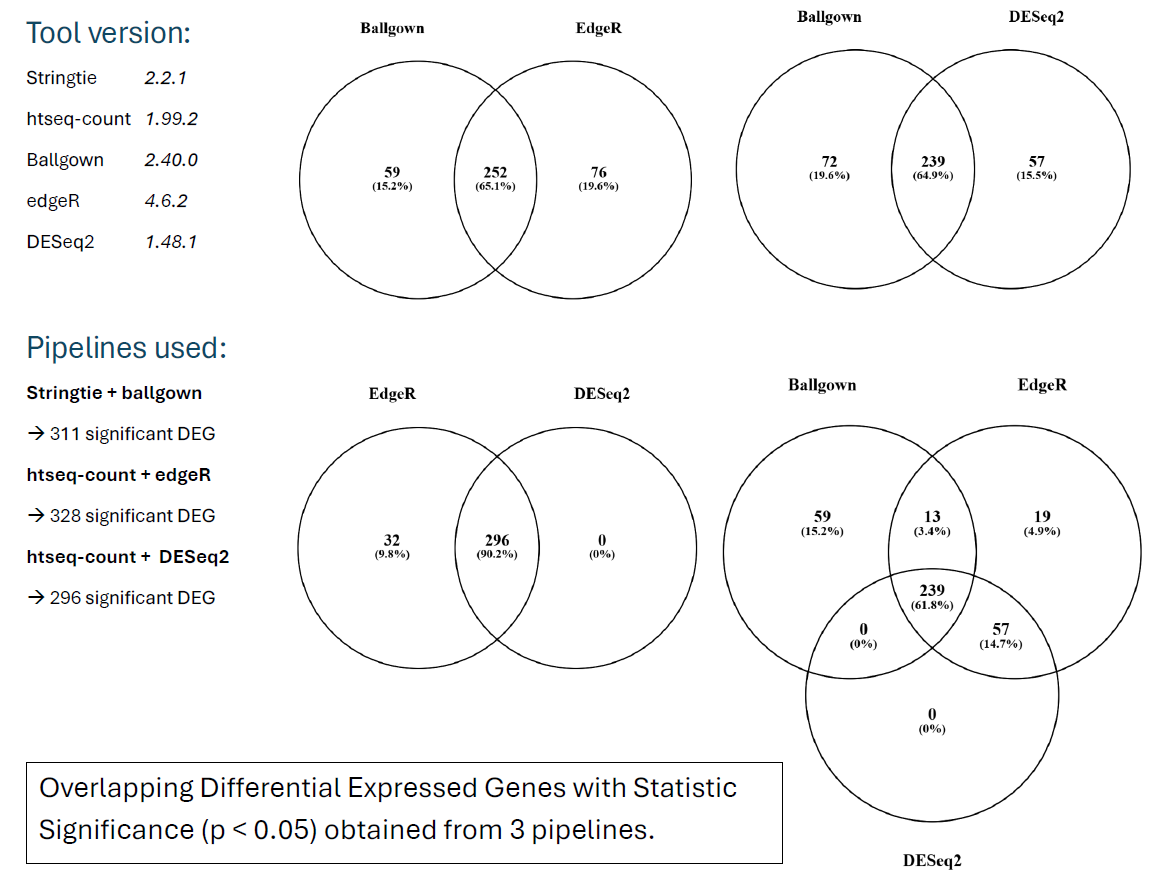